# <center>Обучение с учителем. Методы классификации
## Практика. Дерево решений в задаче предсказания выживания пассажиров "Титаника". Решение

In [106]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

**Считываем обучающую и тестовую выборки.**

In [107]:
train_df = pd.read_csv("titanic_train.csv") 
test_df = pd.read_csv("titanic_test.csv") 

In [108]:
y = train_df['Survived']

In [109]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [110]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Rice, Master. Arthur",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [111]:
test_df.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Geiger, Miss. Amalie",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [112]:
def analyze_by(col, df=train_df, target='Survived'):
    return df[[col, target]].groupby(col, as_index=False).mean().sort_values(by='Survived', ascending=False)

In [113]:
analyze_by('Pclass')

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [114]:
analyze_by('Sex')

,Sex,Survived
0,female,0.742038
1,male,0.188908


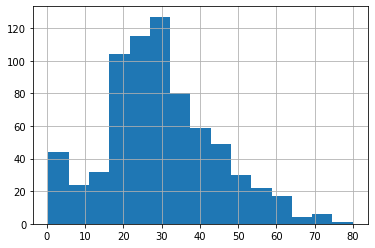

In [115]:
train_df.Age.hist(bins=15);

In [116]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [117]:
train_df.Cabin.value_counts(dropna=False)

NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
C86              1
D21              1
D47              1
D10 D12          1
E31              1
Name: Cabin, Length: 148, dtype: int64

**Заполним пропуски медианными значениями.**

In [118]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna('S', inplace=True)
test_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)

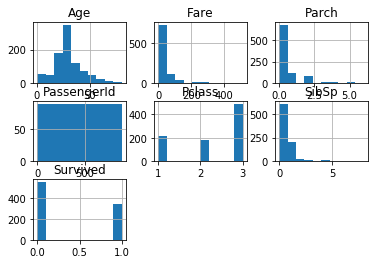

In [119]:
train_df.hist();

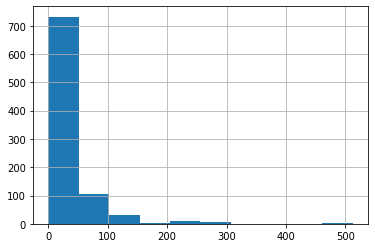

In [120]:
train_df.Fare.hist();

In [121]:
def fare_cat(df):
    if df.Fare <= 50:
        return 'high_number'
    elif df.Fare > 50 and df.Fare <= 150:
        return 'medium_number'
    else:
        return 'low_number'

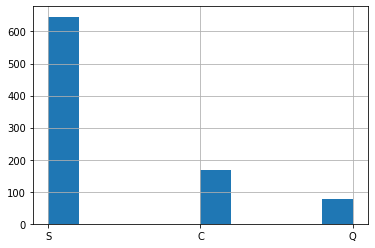

In [122]:
train_df.Embarked.hist();

In [123]:
def age_cat(row):
    if row.Age < 15:
        return 'young'
    elif row.Age >= 15 and row.Age < 32:
        return 'middle'
    else:
        return 'old'   

### добавляем новые признаки

In [124]:
# добавляем размер семьи
train_df['family_size'] = train_df.SibSp + train_df.Parch + 1
test_df['family_size'] = test_df.SibSp + test_df.Parch + 1

In [125]:
analyze_by('family_size')

,family_size,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [126]:
# разделяем признак плата за вход на три категории
train_df['fare_variance'] = train_df.apply(fare_cat, axis=1)
test_df['fare_variance'] = test_df.apply(fare_cat, axis=1)

In [127]:
# разделяем возраст на 3 категории
train_df['age_category'] = train_df.apply(age_cat, axis=1)
test_df['age_category'] = test_df.apply(age_cat, axis=1)

In [128]:
analyze_by('Embarked')

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


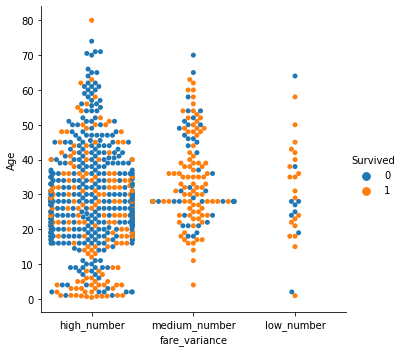

In [129]:
sns.catplot(x="fare_variance", y="Age", hue="Survived", kind="swarm", data=train_df);

**Кодируем категориальные признаки `Pclass`, `Sex`, `SibSp`, `Parch` и `Embarked` с помощью техники One-Hot-Encoding.**

In [130]:
train_df = train_df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)
test_df = test_df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)

In [131]:
train_df = pd.concat([train_df, pd.get_dummies(train_df['Pclass'], 
                                               prefix="PClass"),
                      pd.get_dummies(train_df['Sex'], prefix="Sex"),
                      pd.get_dummies(train_df['SibSp'], prefix="SibSp"),
                      pd.get_dummies(train_df['Parch'], prefix="Parch"),
                      pd.get_dummies(train_df['age_category'], prefix='age_category'),
                      pd.get_dummies(train_df['fare_variance'], prefix='fare_variance'),
                     pd.get_dummies(train_df['Embarked'], prefix="Embarked")],
                     axis=1)
test_df = pd.concat([test_df, pd.get_dummies(test_df['Pclass'], 
                                             prefix="PClass"),
                      pd.get_dummies(test_df['Sex'], prefix="Sex"),
                      pd.get_dummies(test_df['SibSp'], prefix="SibSp"),
                     pd.get_dummies(test_df['age_category'], prefix='age_category'),
                     pd.get_dummies(test_df['fare_variance'], prefix='fare_variance'),
                      pd.get_dummies(test_df['Parch'], prefix="Parch"),
                    pd.get_dummies(test_df['Embarked'], prefix="Embarked")],
                     axis=1)

In [132]:
train_df.drop(['Survived', 'Pclass', 'Sex', 'SibSp', 
               'Parch', 'Embarked'], 
              axis=1, inplace=True)
test_df.drop(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], 
             axis=1, inplace=True)

In [133]:
train_df.columns

Index(['Age', 'Fare', 'family_size', 'fare_variance', 'age_category',
       'PClass_1', 'PClass_2', 'PClass_3', 'Sex_female', 'Sex_male', 'SibSp_0',
       'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8',
       'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5',
       'Parch_6', 'age_category_middle', 'age_category_old',
       'age_category_young', 'fare_variance_high_number',
       'fare_variance_low_number', 'fare_variance_medium_number', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [134]:
train_df.age_category_young.value_counts()

0    813
1     78
Name: age_category_young, dtype: int64

In [135]:
train_df.drop(['age_category', 'fare_variance'], inplace=True, axis=1)

In [136]:
test_df.drop(['age_category', 'fare_variance'], inplace=True, axis=1)

**В тестовой выборке появляется новое значение Parch = 9, которого нет в обучающей выборке. Проигнорируем его.**

In [137]:
train_df.shape, test_df.shape

((891, 31), (418, 32))

In [138]:
set(test_df.columns) - set(train_df.columns)

{'Parch_9'}

In [139]:
test_df.drop(['Parch_9'], axis=1, inplace=True)

In [140]:
train_df.head()

,Age,Fare,family_size,PClass_1,PClass_2,PClass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_6,age_category_middle,age_category_old,age_category_young,fare_variance_high_number,fare_variance_low_number,fare_variance_medium_number,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,2,0,0,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
1,38.0,71.2833,2,1,0,0,1,0,0,1,...,0,0,1,0,0,0,1,1,0,0
2,26.0,7.9250,1,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
3,35.0,53.1000,2,1,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
4,35.0,8.0500,1,0,0,1,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1


In [141]:
test_df.head()

,Age,Fare,family_size,PClass_1,PClass_2,PClass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,34.5,7.8292,1,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,1,0
1,47.0,7.0000,2,0,0,1,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,62.0,9.6875,1,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,1,0
3,27.0,8.6625,1,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
4,22.0,12.2875,3,0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X_train, X_test, y_train, y_test = train_test_split(train_df, y, random_state=3)

In [144]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [145]:
from sklearn.preprocessing import StandardScaler

In [146]:
std_scaler = StandardScaler().fit(X_train_scaled[['Age', 'Fare']])

In [147]:
age_scaled = std_scaler.transform(X_train_scaled[['Age', 'Fare']])

In [148]:
X_train_scaled['Age'] = age_scaled.T[0]
X_train_scaled['Fare'] = age_scaled.T[1]
age_scaled = std_scaler.transform(X_test[['Age', 'Fare']])
X_test_scaled['Age'] = age_scaled.T[0]
X_test_scaled['Fare'] = age_scaled.T[1]

In [149]:
train_df.shape[1] == test_df.shape[1]

True

## 1. Дерево решений без настройки параметров 

**Обучите на имеющейся выборке дерево решений (`DecisionTreeClassifier`) максимальной глубины 2. Используйте параметр `random_state=17` для воспроизводимости результатов.**

In [150]:
from sklearn.tree import DecisionTreeClassifier

In [151]:
model = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)

In [152]:
model.score(X_test, y_test)

0.7847533632286996

In [153]:
from sklearn.metrics import confusion_matrix

In [154]:
confusion_matrix(y_test, model.predict(X_test))

array([[132,   5],
       [ 43,  43]])

In [155]:
test_label = model.predict(test_df)

In [156]:
from sklearn.tree import export_graphviz

In [157]:
dot_data = export_graphviz(model,
                           out_file='tree_2.dot',
                           feature_names=train_df.columns,
                           class_names=True,
                           filled=True,
                           rounded=True)

## Дерево решений с настройкой параметров 

In [158]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [159]:
model1 = DecisionTreeClassifier(random_state=17).fit(X_train, y_train)

In [160]:
# tree params for grid search
tree_params = {'max_depth': list(range(1, 5)), 
               'min_samples_leaf': list(range(1, 5))}

tree_grid = GridSearchCV(model1, tree_params, cv=5, n_jobs=-1, verbose=True)

In [161]:
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=17,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4],
                         'min_

In [162]:
tree_grid.best_score_

0.8099315452811131

In [163]:
tree_grid.best_params_

{'max_depth': 3, 'min_samples_leaf': 2}

In [164]:
grid_labels = tree_grid.predict(test_df)

In [165]:
def write_to_submission_file(predicted_labels, out_file, train_num=891,
                    target='Survived', index_label="PassengerId"):
    # turn predictions into data frame and save as csv file
    predicted_df = pd.DataFrame(predicted_labels,
                                index = np.arange(train_num + 1,
                                                  train_num + 1 +
                                                  predicted_labels.shape[0]),
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

In [166]:
write_to_submission_file(grid_labels, 'result.csv')

In [172]:
print('kaggle result of decision tree with grid search optimizer: 0.73684')

kaggle result of decision tree with grid search optimizer: 0.73684


In [168]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier

In [169]:
ens = ExtraTreesClassifier().fit(X_train, y_train)

In [170]:
ens.score(X_test, y_test)

0.7802690582959642

In [171]:
write_to_submission_file(ens.predict(test_df), 'result.csv')